In [1]:
import subprocess
import time
from subprocess import Popen, PIPE

## Speed-up estimation

In [32]:
def average_command_elapsed_time(cmd, n_reps=3):
    print('running "%s" ...' % cmd)
    avg_elapsed_time = 0
    for _ in range(n_reps):
        start = time.time()
        result = Popen(cmd, shell=True, stdout=PIPE)
        out = result.stdout.read()
        elapsed_time = time.time() - start
        avg_elapsed_time += elapsed_time
        print("\telapsed_time = %f seconds, out = %s" % (elapsed_time, out))
    avg_elapsed_time /= n_reps
    print("\tavg_elapsed_time = %f seconds" % avg_elapsed_time)
    return avg_elapsed_time

In [41]:
import matplotlib.pyplot as plt
def plot_speedup_vs_num_processes(num_processes_list, elapsed_time_list):
    assert num_processes_list[0] == 1    
    speedups = [elapsed_time_list[0]/x for x in elapsed_time_list]
    plt.figure(figsize=(10,7))
    plt.plot(num_processes_list, speedups, label="Speedup")
    plt.xlabel('Number of processes')
    plt.ylabel('Speedup')
    plt.title('Speedup vs Number of processes')
    plt.legend()
    plt.show()

In [3]:
!make

mpicc -o subsetsum-mpi.o subsetsum-mpi.c


## 1) test case without solutions

In [34]:
command_template = "mpiexec -n %d ./subsetsum-mpi.o < input-no-solution.txt"

In [36]:
num_processes = list(range(1, 51))
elapsed_times = [average_command_elapsed_time(command_template % k) for k in num_processes]

running "mpiexec -n 1 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 14.514146 seconds, out = b'0\n'
	elapsed_time = 14.519787 seconds, out = b'0\n'
	elapsed_time = 14.545939 seconds, out = b'0\n'
	avg_elapsed_time = 14.526624 seconds
running "mpiexec -n 2 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 15.757820 seconds, out = b'0\n'
	elapsed_time = 15.681074 seconds, out = b'0\n'
	elapsed_time = 15.774690 seconds, out = b'0\n'
	avg_elapsed_time = 15.737861 seconds
running "mpiexec -n 3 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 7.996956 seconds, out = b'0\n'
	elapsed_time = 8.071341 seconds, out = b'0\n'
	elapsed_time = 8.018927 seconds, out = b'0\n'
	avg_elapsed_time = 8.029075 seconds
running "mpiexec -n 4 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 7.872782 seconds, out = b'0\n'
	elapsed_time = 7.883822 seconds, out = b'0\n'
	elapsed_time = 7.889429 seconds, out = b'0\n'
	avg_elapsed_time = 7.882011 seconds
runn

	elapsed_time = 1.418912 seconds, out = b'0\n'
	elapsed_time = 1.375993 seconds, out = b'0\n'
	elapsed_time = 1.376878 seconds, out = b'0\n'
	avg_elapsed_time = 1.390594 seconds
running "mpiexec -n 35 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 1.338894 seconds, out = b'0\n'
	elapsed_time = 1.386155 seconds, out = b'0\n'
	elapsed_time = 1.384252 seconds, out = b'0\n'
	avg_elapsed_time = 1.369767 seconds
running "mpiexec -n 36 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 1.386168 seconds, out = b'0\n'
	elapsed_time = 1.426668 seconds, out = b'0\n'
	elapsed_time = 1.363506 seconds, out = b'0\n'
	avg_elapsed_time = 1.392114 seconds
running "mpiexec -n 37 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 1.395013 seconds, out = b'0\n'
	elapsed_time = 1.461468 seconds, out = b'0\n'
	elapsed_time = 1.419411 seconds, out = b'0\n'
	avg_elapsed_time = 1.425297 seconds
running "mpiexec -n 38 ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed

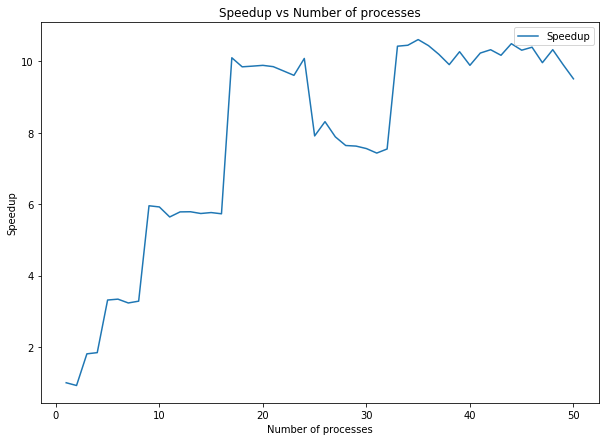

In [42]:
plot_speedup_vs_num_processes(num_processes, elapsed_times)

## 2) test case with unique solution

In [43]:
command_template = "mpiexec -n %d ./subsetsum-mpi.o < input-unique-solution.txt"

In [ ]:
num_processes = list(range(1, 51))
elapsed_times = [average_command_elapsed_time(command_template % k) for k in num_processes]

running "mpiexec -n 1 ./subsetsum-mpi.o < input-unique-solution.txt" ...
	elapsed_time = 14.524491 seconds, out = b'1 300000\n'
	elapsed_time = 14.528666 seconds, out = b'1 300000\n'
	elapsed_time = 14.519198 seconds, out = b'1 300000\n'
	avg_elapsed_time = 14.524118 seconds
running "mpiexec -n 2 ./subsetsum-mpi.o < input-unique-solution.txt" ...
	elapsed_time = 15.788696 seconds, out = b'1 300000\n'
	elapsed_time = 15.799679 seconds, out = b'1 300000\n'
	elapsed_time = 15.734608 seconds, out = b'1 300000\n'
	avg_elapsed_time = 15.774327 seconds
running "mpiexec -n 3 ./subsetsum-mpi.o < input-unique-solution.txt" ...
	elapsed_time = 8.333104 seconds, out = b'1 300000\n'
	elapsed_time = 8.071786 seconds, out = b'1 300000\n'
	elapsed_time = 8.025267 seconds, out = b'1 300000\n'
	avg_elapsed_time = 8.143386 seconds
running "mpiexec -n 4 ./subsetsum-mpi.o < input-unique-solution.txt" ...
	elapsed_time = 7.890893 seconds, out = b'1 300000\n'
	elapsed_time = 7.928621 seconds, out = b'1 30000

	elapsed_time = 1.765278 seconds, out = b'1 300000\n'
	elapsed_time = 1.837475 seconds, out = b'1 300000\n'
	elapsed_time = 2.109591 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.904115 seconds
running "mpiexec -n 32 ./subsetsum-mpi.o < input-unique-solution.txt" ...
	elapsed_time = 2.051075 seconds, out = b'1 300000\n'
	elapsed_time = 1.816118 seconds, out = b'1 300000\n'
	elapsed_time = 1.818944 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.895379 seconds
running "mpiexec -n 33 ./subsetsum-mpi.o < input-unique-solution.txt" ...
	elapsed_time = 1.339210 seconds, out = b'1 300000\n'
	elapsed_time = 1.388386 seconds, out = b'1 300000\n'
	elapsed_time = 1.105529 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.277708 seconds
running "mpiexec -n 34 ./subsetsum-mpi.o < input-unique-solution.txt" ...
	elapsed_time = 1.322394 seconds, out = b'1 300000\n'
	elapsed_time = 1.315679 seconds, out = b'1 300000\n'


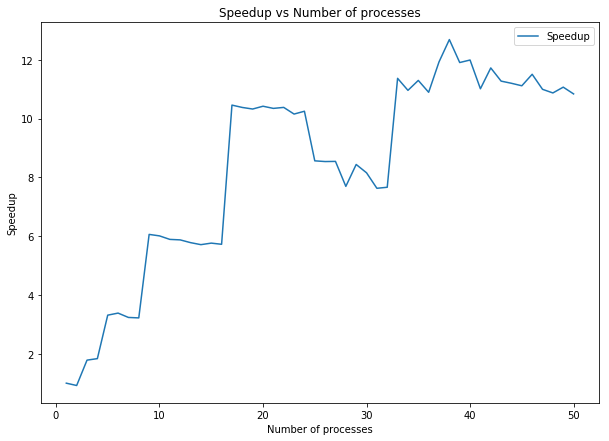

In [46]:
plot_speedup_vs_num_processes(num_processes, elapsed_times)

## 3) test case with no solutions + using SLURM

In [47]:
command_template = "salloc -p all -n %d --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsetsum-mpi.o < input-no-solution.txt"

In [48]:
num_processes = list(range(1, 51))
elapsed_times = [average_command_elapsed_time(command_template % k) for k in num_processes]

running "salloc -p all -n 1 --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 25.764019 seconds, out = b'0\n'
	elapsed_time = 26.797225 seconds, out = b'0\n'
	elapsed_time = 26.204401 seconds, out = b'0\n'
	avg_elapsed_time = 26.255215 seconds
running "salloc -p all -n 2 --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 38.583620 seconds, out = b'0\n'
	elapsed_time = 39.561388 seconds, out = b'0\n'
	elapsed_time = 39.675711 seconds, out = b'0\n'
	avg_elapsed_time = 39.273573 seconds
running "salloc -p all -n 3 --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 20.509121 seconds, out = b'0\n'
	elapsed_time = 20.031459 seconds, out = b'0\n'
	elapsed_time = 20.560166 seconds, out = b'0\n'
	avg_elapsed_time = 20.366915 seconds
running "salloc -p all -n 4 --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsets

	elapsed_time = 3.173702 seconds, out = b'0\n'
	elapsed_time = 3.053480 seconds, out = b'0\n'
	elapsed_time = 3.067919 seconds, out = b'0\n'
	avg_elapsed_time = 3.098367 seconds
running "salloc -p all -n 29 --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 3.116201 seconds, out = b'0\n'
	elapsed_time = 3.061661 seconds, out = b'0\n'
	elapsed_time = 3.070145 seconds, out = b'0\n'
	avg_elapsed_time = 3.082669 seconds
running "salloc -p all -n 30 --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 3.020032 seconds, out = b'0\n'
	elapsed_time = 3.096469 seconds, out = b'0\n'
	elapsed_time = 3.099163 seconds, out = b'0\n'
	avg_elapsed_time = 3.071888 seconds
running "salloc -p all -n 31 --nodelist=hydra,kraken mpirun -mca btl ^openib ./subsetsum-mpi.o < input-no-solution.txt" ...
	elapsed_time = 2.970088 seconds, out = b'0\n'
	elapsed_time = 3.144658 seconds, out = b'0\n'


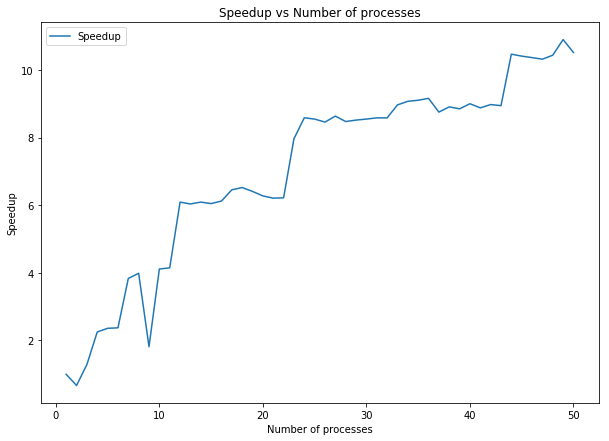

In [49]:
plot_speedup_vs_num_processes(num_processes, elapsed_times)